In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import random

In [3]:
def add_noise(inputs,noise_factor=0.3):
     noisy = inputs+torch.randn_like(inputs) * noise_factor
     noisy = torch.clip(noisy,0.,1.)
     return noisy

In [25]:
def AugmentData(path,iterations):
  augmented_train_data = []
  my_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128,128)),
  
    transforms.RandomRotation(15),
    transforms.RandomRotation(5)
    ])

  for i in range(iterations):
      data = ImageFolder(root=path, transform = my_transform)
      for j, item in enumerate(data):
          x = random.choice([0,0,1])
          (img,label) = item
          
          
          if x == 0:
            augmented_train_data.append((add_noise(img,0.08),label))
          else:
            
            augmented_train_data.append((img,label))
  return augmented_train_data

def RawData(path):
  my_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128,128)),
    ])

  data = ImageFolder(root=path, transform = my_transform)

  return data


In [9]:
def GenerateBackGround(data_,padding_max_size = 200):
    new_data = []
    
    for (img,labels) in data_:
        x = random.randint(0,3)

        y = (x+1)%4
        print(y)

        pad = np.zeros(4,dtype = np.int32)
        pad[x] += padding_max_size
        pad[y] += padding_max_size
        x_ = random.randint(0,padding_max_size//10-1)
        y_ = random.randint(0,padding_max_size//10-1)
        count =0
        for z in range(4):
            if z!=x and z!=y:
                if count == 0:
                    pad[z]+=x_*10
                    count+=1
                else:
                    pad[z]+=y_*10

        data_transform = transforms.Compose([transforms.Resize((128,128)),transforms.Pad(padding= tuple(pad), fill =img.mean([1,2]).mean().item()),transforms.Resize((128,128))])
        new_data.append((data_transform(img),labels))
    return new_data

In [18]:
def get_label_name(classes,indice):
  return classes[indice]

In [38]:
classes = ["100kmh","30kmh","60kmh","ChildrenCrossing","KeepRight","NoEntry","NoLeft","NoRight","Stop","yield"]

In [39]:
augmented_data = AugmentData("Data",9)

In [40]:
print(len(augmented_data))

4617


In [41]:
for i in range(len(augmented_data)):
    (img,label) = augmented_data[i]
    plt.imsave("AugData/{}/img{}.png".format(get_label_name(classes,label),i),np.array(img.transpose(0,1).transpose(1,2)))

In [35]:
import seaborn as sn

In [42]:
counter = np.zeros(len(classes))

for item in augmented_data:
    counter[item[1]] +=1

print(counter)



[540. 504. 396. 360. 459. 360. 369. 459. 531. 639.]


C:\Users\Emilien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

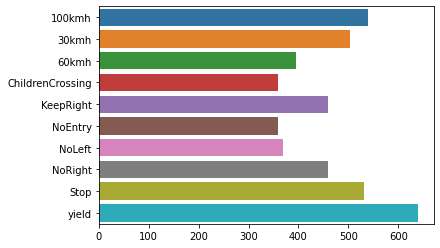

In [43]:
sn.barplot(counter, classes)

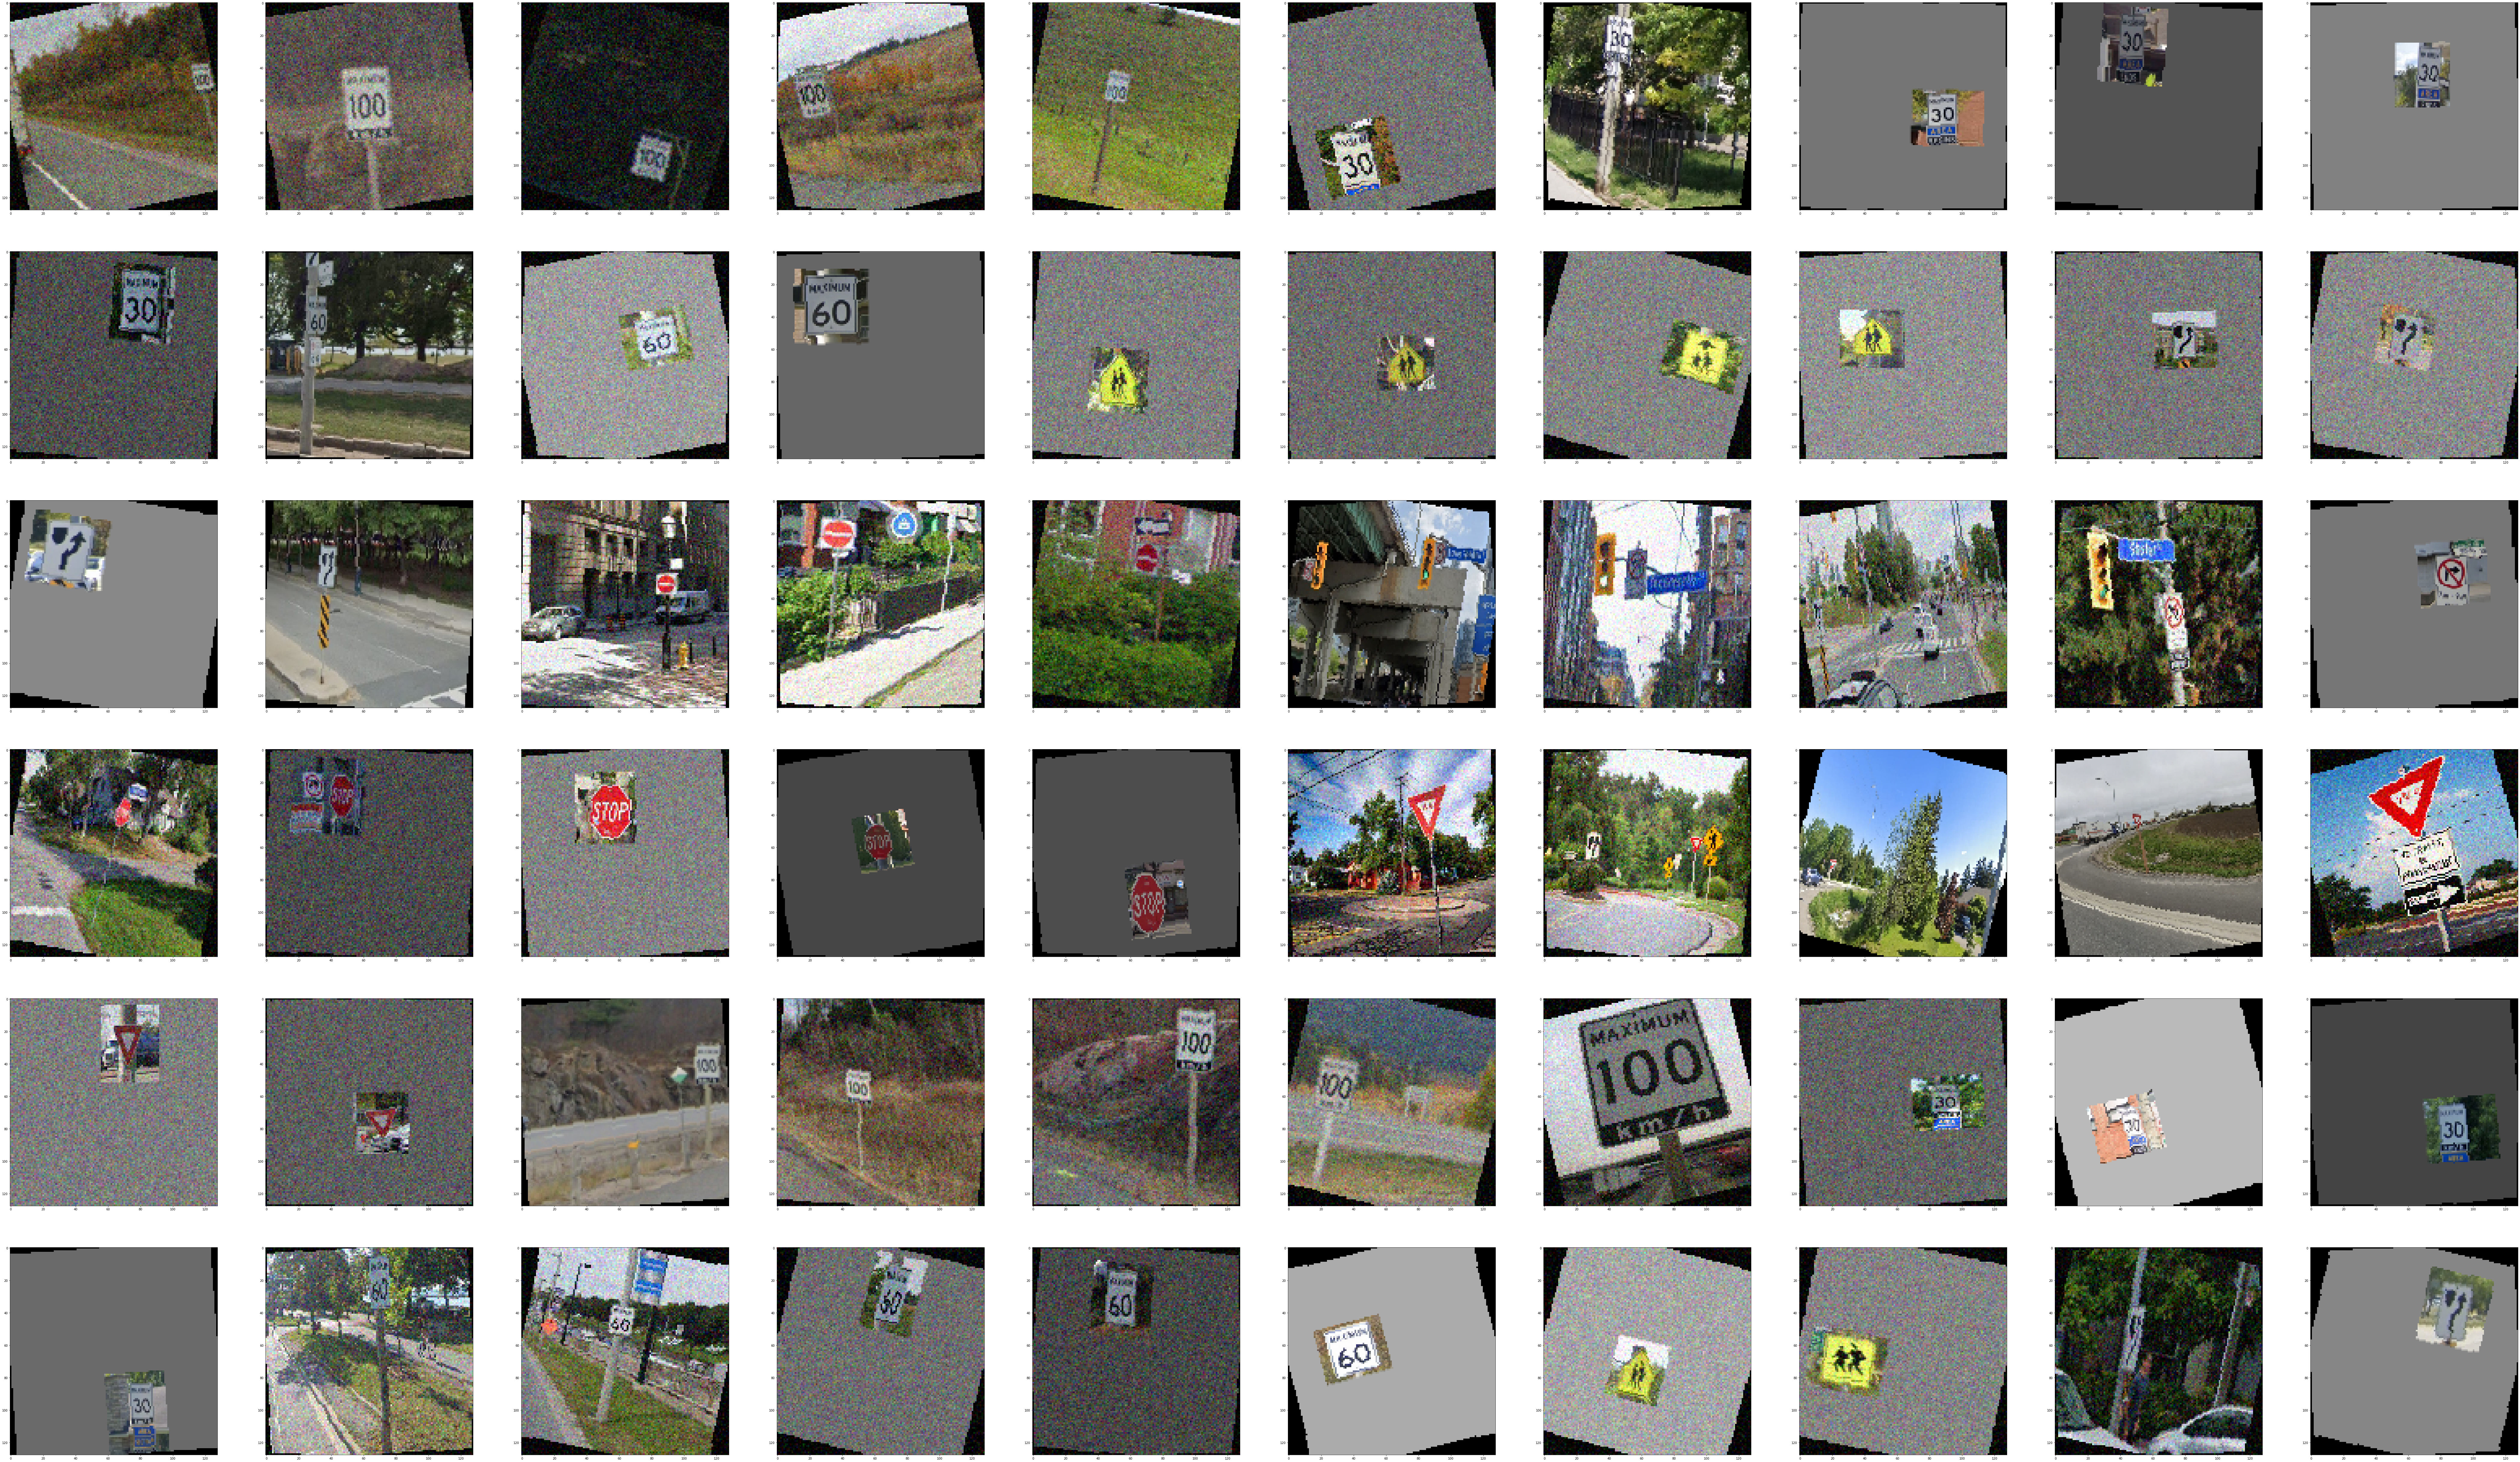

In [44]:
counter = 0
plt.figure(figsize = (150,150))
for (img,lbl) in augmented_data:
    x = random.randint(0,10)   
    if counter<60 and x<1:
        counter+=1
        plt.subplot(len(classes), 10, counter)
        plt.imshow(img.transpose(0,1).transpose(1,2))


min val: 0.0   max val: 0.9249484539031982
mean :tensor([0.2427, 0.3159, 0.3770]) and std : tensor([0.1591, 0.1456, 0.1448])


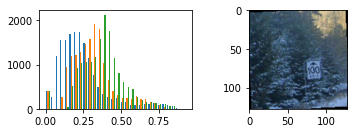

min val: 0.0   max val: 1.0
mean :tensor([0.3796, 0.3536, 0.2833]) and std : tensor([0.1860, 0.1925, 0.2060])


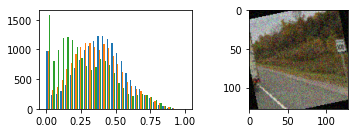

min val: 0.0   max val: 1.0
mean :tensor([0.4292, 0.4449, 0.2547]) and std : tensor([0.1632, 0.1685, 0.1350])


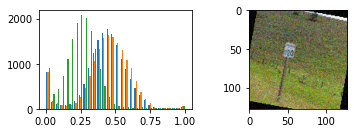

min val: 0.0   max val: 1.0
mean :tensor([0.5807, 0.5904, 0.5190]) and std : tensor([0.1854, 0.2023, 0.2832])


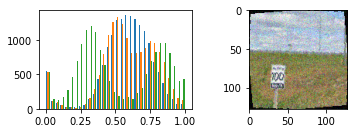

min val: 0.0   max val: 1.0
mean :tensor([0.1798, 0.1943, 0.1967]) and std : tensor([0.1360, 0.1384, 0.1488])


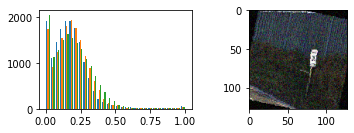

min val: 0.0   max val: 1.0
mean :tensor([0.2626, 0.2717, 0.2730]) and std : tensor([0.2847, 0.2766, 0.2782])


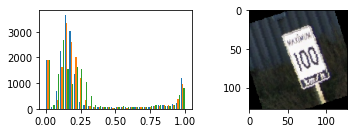

min val: 0.0   max val: 1.0
mean :tensor([0.3278, 0.3469, 0.2504]) and std : tensor([0.2479, 0.2435, 0.2255])


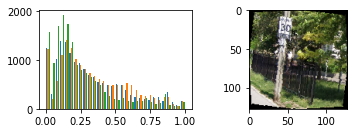

min val: 0.0   max val: 1.0
mean :tensor([0.4355, 0.4583, 0.5001]) and std : tensor([0.2104, 0.2204, 0.2943])


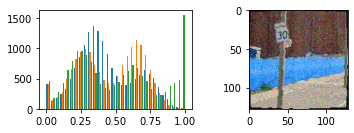

min val: 0.0   max val: 0.9921568632125854
mean :tensor([0.3589, 0.3594, 0.3577]) and std : tensor([0.1371, 0.1362, 0.1425])


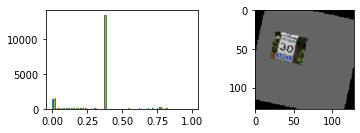

min val: 0.0   max val: 1.0
mean :tensor([0.6222, 0.6211, 0.6194]) and std : tensor([0.1023, 0.1049, 0.0997])


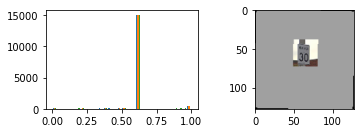

min val: 0.0   max val: 0.9921568632125854
mean :tensor([0.4961, 0.4964, 0.4876]) and std : tensor([0.1359, 0.1347, 0.1352])


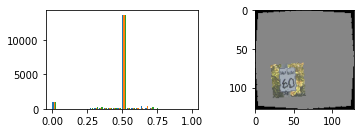

min val: 0.0   max val: 0.9960784316062927
mean :tensor([0.6048, 0.6027, 0.5964]) and std : tensor([0.1446, 0.1448, 0.1517])


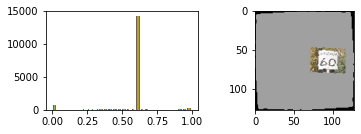

min val: 0.0   max val: 1.0
mean :tensor([0.5237, 0.5268, 0.5208]) and std : tensor([0.2105, 0.2100, 0.2149])


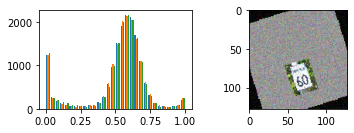

min val: 0.0   max val: 0.9960784316062927
mean :tensor([0.5132, 0.5154, 0.5092]) and std : tensor([0.1188, 0.1185, 0.1216])


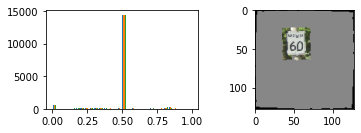

min val: 0.0   max val: 0.9113844633102417
mean :tensor([0.2779, 0.2802, 0.2745]) and std : tensor([0.1203, 0.1211, 0.1231])


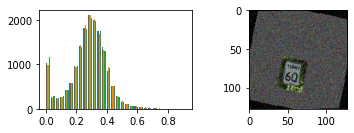

min val: 0.0   max val: 0.9333333373069763
mean :tensor([0.4491, 0.4504, 0.4310]) and std : tensor([0.1101, 0.1124, 0.0980])


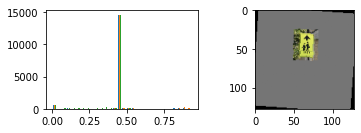

min val: 0.0   max val: 0.9314085841178894
mean :tensor([0.3710, 0.3707, 0.3617]) and std : tensor([0.1419, 0.1431, 0.1379])


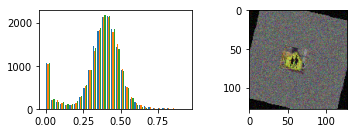

min val: 0.0   max val: 0.9098039269447327
mean :tensor([0.2812, 0.2827, 0.2687]) and std : tensor([0.1197, 0.1207, 0.1003])


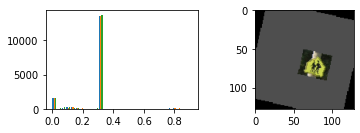

min val: 0.0   max val: 1.0
mean :tensor([0.2816, 0.2818, 0.2729]) and std : tensor([0.1197, 0.1207, 0.1134])


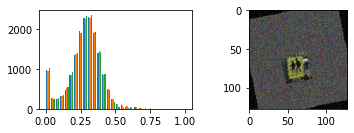

min val: 0.0   max val: 1.0
mean :tensor([0.5060, 0.5051, 0.4872]) and std : tensor([0.1508, 0.1491, 0.1412])


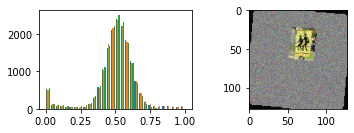

In [45]:
# max and min values
counter = 0
for (img,lbl) in augmented_data:
    x = random.randint(0,10)   
    if counter<20 and x<1:
        counter+=1


        print('min val:', torch.min(img).item(), '  max val:', torch.max(img).item())
        fig = plt.figure()
        print("mean :{} and std :q {}".format(img.mean([1,2]), img.std([1,2])))
        fig.add_subplot(221)
        plt.hist(img.view(-1,128*128), bins=30)
        fig.add_subplot(222)
        plt.imshow(img.transpose(0,1).transpose(1,2))
        plt.show()
        